In [113]:
import pandas as pd
import sqlite3

con = sqlite3.connect('main.db')

prefix_sql = '''
select projects.name as project_name, path, byte_count
from files, projects, proj_summary psum
on files.project_id = projects.id
and projects.name = psum.name
'''
# c_df = pd.read_sql(f"{prefix_sql} where language='C' and size_mb < 190", con)
c_df = pd.read_sql(f"{prefix_sql} where language='C'", con)
python_df = pd.read_sql(f"{prefix_sql} where language='Python'", con)



In [114]:
import seaborn as sns
import matplotlib.pyplot as plt  # TODO: remove?

# PLOT STYLE AND GLOBALS
#
# context = scaling; theme = visuals; style = general things
sns.set_theme(context='talk', palette='rainbow', font_scale=0.8)

# - palette: deep, muted, bright, pastel, dark, colorblind
# sns.set_palette("colorblind")
# sns.set_context("notebook", font_scale=1.5)


/Users/johnmitchell/jsrc/shotglass/dec/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


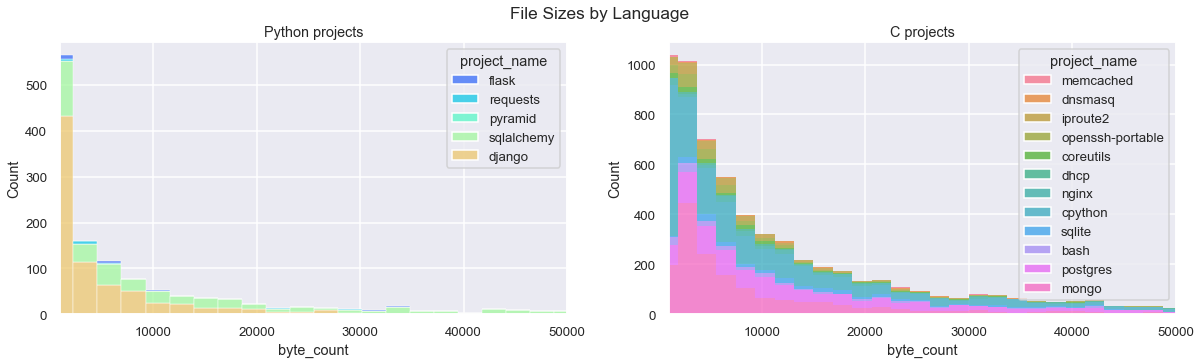

In [116]:
# actual plots

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('File Sizes by Language')

if 1:
    c_hist_p = sns.histplot(data=c_df, x="byte_count", hue="project_name", multiple="stack")
    axs[1].set(xlim=(1000, 50_000))
    c_hist_p.set(title="C projects")

if 1:
    py_hist_p = sns.histplot(data=python_df, x="byte_count", hue="project_name", multiple="stack", ax=axs[0])
    axs[0].set(xlim=(1000, 50_000))
    py_hist_p.set(title="Python projects")


# Resources

## Seaborn
* https://seaborn.pydata.org/examples/horizontal_boxplot.html

## Pandas
* intro https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-formatting
* https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* https://pandas.pydata.org/pandas-docs/version/0.18.1/cookbook.html#cookbook-plotting